In [1]:
import pandas as pd
df = pd.read_csv("level_coding_siswa_150.csv")
df

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced
...,...,...,...,...,...,...
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate


In [2]:
df.shape

(174, 6)

In [17]:
df.columns

Index(['hours_coding_daily', 'preferred_language', 'typing_speed',
       'import_usage', 'oop_usage', 'level'],
      dtype='object')

In [4]:
df.describe()

,hours_coding_daily,typing_speed
count,174.000000,174.000000
mean,3.215517,38.810345
std,1.299551,14.306864
min,1.000000,20.000000
25%,2.000000,25.250000
50%,3.000000,38.000000
75%,4.000000,50.000000
max,5.500000,65.000000


In [5]:
df.head()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced


In [6]:
df.tail()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate
173,3.0,C++,38,Yes,No,Intermediate


In [7]:
df["preferred_language"].value_counts()

preferred_language
Python    60
C++       59
Java      55
Name: count, dtype: int64

In [8]:
df["import_usage"].value_counts()

import_usage
Yes    92
No     82
Name: count, dtype: int64

In [9]:
df["oop_usage"].value_counts()

oop_usage
No     93
Yes    81
Name: count, dtype: int64

In [10]:
df["level"].value_counts()

level
Advanced        64
Beginner        59
Intermediate    51
Name: count, dtype: int64

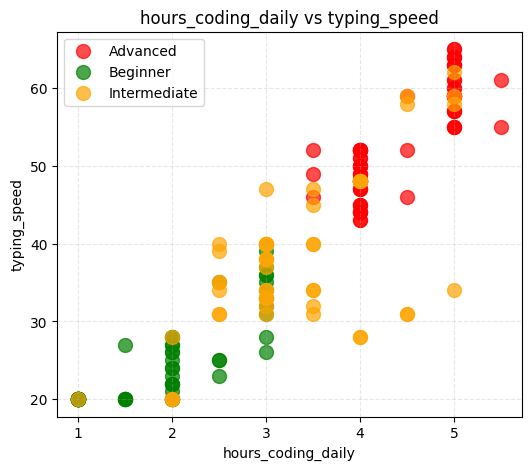

In [13]:
import matplotlib.pyplot as plt
advanced=df[df["level"]=="Advanced"]
beginner=df[df["level"]=="Beginner"]
intermediate=df[df["level"]=="Intermediate"]

plt.figure(figsize=(6,5))
plt.scatter(advanced["hours_coding_daily"], advanced["typing_speed"], s=100, color="red", alpha=0.7, label="Advanced")
plt.scatter(beginner["hours_coding_daily"], beginner["typing_speed"], s=100, color="green", alpha=0.7, label="Beginner")
plt.scatter(intermediate["hours_coding_daily"], intermediate["typing_speed"], s=100, color="orange", alpha=0.7, label="Intermediate")
plt.xlabel("hours_coding_daily")
plt.ylabel("typing_speed")
plt.title("hours_coding_daily vs typing_speed")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()
           

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[['hours_coding_daily', 'preferred_language', 'typing_speed',
       'import_usage', 'oop_usage']]
y = df['level']

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42
)

numeric_column = ['hours_coding_daily', 'typing_speed']
categorical_column = ['preferred_language', 'import_usage', 'oop_usage']

preprocessing = ColumnTransformer (
    transformers = [
        ("scaler", StandardScaler(), numeric_column),
        ("ohe", OneHotEncoder(), categorical_column)
    ]
)

model = Pipeline (
    steps = [
        ("preprocessing", preprocessing),
        ("model", RandomForestClassifier())
    ]
)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy score :\n", accuracy_score(y_test, y_pred))
print("clasiifiaction report :\n", classification_report(y_test, y_pred))
print("confusion matrix :\n", confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(scores)
print(scores.mean())

accuracy score :
 0.8857142857142857
clasiifiaction report :
               precision    recall  f1-score   support

    Advanced       0.94      0.94      0.94        17
    Beginner       0.88      0.88      0.88         8
Intermediate       0.80      0.80      0.80        10

    accuracy                           0.89        35
   macro avg       0.87      0.87      0.87        35
weighted avg       0.89      0.89      0.89        35

confusion matrix :
 [[16  0  1]
 [ 0  7  1]
 [ 1  1  8]]
[0.78571429 0.82142857 0.82142857 0.89285714 0.88888889]
0.8420634920634921


In [29]:
import pandas as pd
data = pd.DataFrame(
    [[4.0, "Python", 35, "No", "No"]], columns=['hours_coding_daily', 'preferred_language', 'typing_speed',
       'import_usage', 'oop_usage']
)
prediksi = model.predict(data)[0]
presentase = max(model.predict_proba(data)[0])
print(f"Prediksi : {prediksi} Presentase Keyakinan : {presentase*100:.2f}%")

Prediksi : Intermediate Presentase Keyakinan : 60.00%


In [30]:
import joblib 
joblib.dump(model, "model_level_coding_classifier.joblib")

['model_level_coding_classifier.joblib']